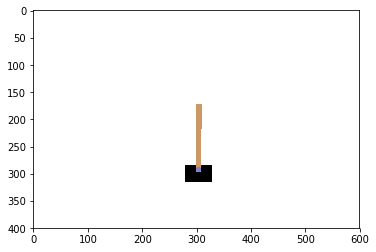

In [1]:
import gym 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
env = gym.make("CartPole-v0")
env.reset()
n_actions = env.action_space.n

plt.imshow(env.render("rgb_array"))

In [2]:
from joblib import Parallel, delayed

In [3]:
N = 1000 # n_of_frames for each game 
npop = 100 # population size
sigma= 0.1 # deviation 
w = np.random.randn(4) # probabilities of action_0 on each frame ## to update!
alpha =0.1 #learning rate

In [4]:
def training(w_new):
    env = gym.make("CartPole-v0")
    s = env.reset()
    rewards= []
    for j in range(N):
        prob = np.clip(np.dot(w_new.T,s),0,1)
        p = [prob,1.-prob]
        new_state, r, done, _ = env.step(np.random.choice(n_actions,p = p))
        rewards.append(r)
        s=new_state
        if done:
            break
    return sum(rewards)

In [5]:
def full_train(w):
    for n_episodes in range(1000):
        R=[]
        w_try = np.random.randn(npop,4) 
    
        for i in range(npop):
            w_new=w + sigma*w_try[i]
            R.append(training(w_new))
        if n_episodes%10 == 0: print('episode of game {}, mean reward over population {}'
                                .format(n_episodes, np.mean(R)))
        if np.mean(R) > 195: 
            print('iteration {} mean reward over population {}'.format(n_episodes,np.mean(R)))
            break
        R = (R-np.mean(R))/(1+np.std(R))
        w += alpha/(npop*sigma)* np.dot(w_try.T,R)   
    return w

In [6]:
%%time
w_new = full_train(w)

episode of game 0, mean reward over population 24.14
episode of game 10, mean reward over population 39.74
episode of game 20, mean reward over population 47.7
episode of game 30, mean reward over population 50.4
episode of game 40, mean reward over population 55.65
episode of game 50, mean reward over population 64.92
episode of game 60, mean reward over population 61.97
episode of game 70, mean reward over population 63.68
episode of game 80, mean reward over population 63.01
episode of game 90, mean reward over population 71.33
episode of game 100, mean reward over population 78.94
episode of game 110, mean reward over population 73.48
episode of game 120, mean reward over population 68.07
episode of game 130, mean reward over population 70.2
episode of game 140, mean reward over population 108.32
episode of game 150, mean reward over population 139.05
episode of game 160, mean reward over population 173.31
iteration 162 mean reward over population 199.58
Wall time: 41.9 s


In [15]:
N = 1000 # n_of_frames for each game 
npop = 100 # population size
sigma= 0.1 # deviation 
w = np.random.randn(4) # probabilities of action_0 on each frame ## to update!
alpha =0.1 #learning rate

In [16]:
def training_parallel(w_new):
    env = gym.make("CartPole-v0").env
    s = env.reset()
    rewards= []
    for j in range(N):
        prob = np.clip(np.dot(w_new.T,s),0,1)
        p = [prob,1.-prob]
        new_state, r, done, _ = env.step(np.random.choice(n_actions,p = p))
        rewards.append(r)
        s=new_state
        if done:
            break
    return sum(rewards)

In [17]:
def full_train_parallel(w):
    for n_episodes in range(1000):
        w_try = np.random.randn(npop,4) 
        R = Parallel(n_jobs=4)(delayed(training_parallel)(w+sigma*w_try[i]) for i in range(npop))
        
        if n_episodes%10 == 0: print('episode of game {}, mean reward over population {}'
                                .format(n_episodes, np.mean(R)))
        if np.mean(R) > 195: 
            print('iteration {} mean reward over population {}'.format(n_episodes,np.mean(R)))
            break
        R = (R-np.mean(R))/(1+np.std(R))
        w += alpha/(npop*sigma)* np.dot(w_try.T,R)    
    return w

In [18]:
%%time
w_new = full_train_parallel(w)

episode of game 0, mean reward over population 20.29
episode of game 10, mean reward over population 31.98
episode of game 20, mean reward over population 38.4
episode of game 30, mean reward over population 42.98
episode of game 40, mean reward over population 48.24
episode of game 50, mean reward over population 47.46
episode of game 60, mean reward over population 45.61
episode of game 70, mean reward over population 46.96
episode of game 80, mean reward over population 44.1
episode of game 90, mean reward over population 46.69
episode of game 100, mean reward over population 48.07
episode of game 110, mean reward over population 46.88
episode of game 120, mean reward over population 51.67
episode of game 130, mean reward over population 53.57
episode of game 140, mean reward over population 57.51
episode of game 150, mean reward over population 57.57
episode of game 160, mean reward over population 59.13
episode of game 170, mean reward over population 58.96
episode of game 180, me